<a href="https://colab.research.google.com/github/Pathakarnav22/Machine-Learning/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train =y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse",'ship',"truck"]

In [8]:
classes[9]

'truck'

In [9]:
def plot_sample(X,y,index,classes_name):
    fig = plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes_name[y[index]])



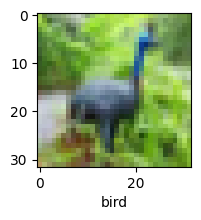

In [10]:
plot_sample(X_train,y_train,6,classes)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 84ms/step - accuracy: 0.3012 - loss: 1.9359
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.4163 - loss: 1.6513
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 84ms/step - accuracy: 0.4553 - loss: 1.5513
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 84ms/step - accuracy: 0.4707 - loss: 1.4968
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 94ms/step - accuracy: 0.4956 - loss: 1.4290


In [13]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step


In [17]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32 , kernel_size = (3,3),activation = 'relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),


    layers.Conv2D(filters = 64 , kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),


    ##dense

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.6214 - loss: 1.0828
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6892 - loss: 0.9021
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7285 - loss: 0.7789
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7657 - loss: 0.6753
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7899 - loss: 0.5992
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.8177 - loss: 0.5206
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.8428 - loss: 0.4554
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.8649 - loss: 0.3929
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.8852 - loss: 0.3301
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9036 - loss: 0.2827


In [21]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [23]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6852 - loss: 1.1547


[1.1778403520584106, 0.6855000257492065]

In [24]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [25]:
y_test = y_test.reshape(-1,)

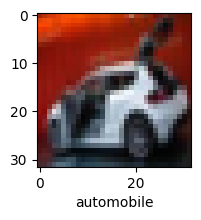

In [28]:
plot_sample(X_test,y_test,6,classes)

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[1.26145751e-04, 1.81704036e-05, 9.70378678e-05, 9.86204445e-01,
        1.71839019e-06, 1.02909906e-02, 1.56820053e-03, 1.16278985e-04,
        1.56753743e-03, 9.42040788e-06],
       [2.37492031e-06, 1.61702381e-04, 1.36285384e-12, 3.30266717e-11,
        1.27734834e-12, 6.32153870e-16, 1.03864678e-13, 2.07694530e-17,
        9.99831676e-01, 4.32537900e-06],
       [2.05963463e-01, 1.07890577e-03, 3.77160410e-04, 8.31017969e-05,
        3.13591940e-04, 4.33166679e-06, 5.16032878e-06, 9.84087183e-06,
        7.89555192e-01, 2.60926574e-03],
       [9.80718136e-01, 1.36913068e-05, 7.67171223e-05, 4.76677174e-04,
        2.26308512e-05, 9.83667050e-08, 4.42831624e-05, 4.23058433e-09,
        1.86473485e-02, 4.03343080e-07],
       [9.49911616e-09, 3.73799793e-07, 9.31622740e-03, 3.14130774e-03,
        4.50805485e-01, 4.44475852e-04, 5.36283195e-01, 1.21270853e-06,
        7.58795613e-06, 1.12318936e-08]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
classes[y_classes[6]]

'automobile'

In [37]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           1       0.81      0.76      0.78      1000
           2       0.56      0.57      0.56      1000
           3       0.50      0.53      0.51      1000
           4       0.65      0.62      0.63      1000
           5       0.63      0.55      0.58      1000
           6       0.76      0.78      0.77      1000
           7       0.74      0.72      0.73      1000
           8       0.77      0.82      0.79      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

